#Aadhaar Card Data Analysis

Aadhaar is a Unique Identification Number being issued by the government of India to those who desire it. It is given to citizens in the form of a card (similar to a Social Security or Driver's license card). It serves as a proof of identity and address. More information is available here: http://uidai.gov.in/

A dataset of issued Aadhaar cards is now available online: https://data.uidai.gov.in/uiddatacatalog/dataCatalogHome.do

The goal of this project is to observe this data and make some basic analysis on the dataset. This is a project in progress!

In [42]:
# Import modules and libraries that are of interest
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
%matplotlib inline

In [22]:
# Load the data from csv to a Pandas data frame
df = pd.read_csv('UIDAI-ENR-DETAIL-20150321.csv')
print(df.dtypes)
df.head(3)

Registrar                            object
Enrolment Agency                     object
State                                object
District                             object
Sub District                         object
Pin Code                              int64
Gender                               object
Age                                   int64
Aadhaar generated                     int64
Enrolment Rejected                    int64
Residents providing email             int64
Residents providing mobile number     int64
dtype: object


,Registrar,Enrolment Agency,State,District,Sub District,Pin Code,Gender,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
0,Allahabad Bank,A-Onerealtors Pvt Ltd,Assam,Barpeta,Barnagar,781315,M,27,1,0,1,1
1,Allahabad Bank,A-Onerealtors Pvt Ltd,Bihar,Bhagalpur,Nathnagar,812004,M,25,1,0,0,1
2,Allahabad Bank,A-Onerealtors Pvt Ltd,Bihar,East Champaran,Motihari,845401,M,28,1,0,0,1


In [23]:
# Get basic information about the datast
df.describe()

,Pin Code,Age,Aadhaar generated,Enrolment Rejected,Residents providing email,Residents providing mobile number
count,459663.000000,459663.000000,459663.000000,459663.000000,459663.000000,459663.000000
mean,441099.486178,32.699308,1.874380,0.105749,0.014709,0.904458
std,252264.746829,19.069176,2.697839,0.949674,0.139893,1.305259
min,110001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,231304.000000,18.000000,1.000000,0.000000,0.000000,0.000000
50%,313701.000000,30.000000,1.000000,0.000000,0.000000,1.000000
75%,732125.000000,46.000000,2.000000,0.000000,0.000000,1.000000
max,855456.000000,116.000000,234.000000,352.000000,8.000000,51.000000


## Data Wrangling

In [24]:
# Renaming some variables for convenience
df=df.rename(columns = {'enrolment agency':'agency',\
                        'Aadhaar generated':'generated',\
                        'Enrolment Rejected':'rejected',\
                        'Residents providing email':'email',\
                        'Residents providing mobile number':'mobile'})


Looks like there are situations where the Aadhaar enrolment has been rejected multiple times and Aadhaar generation has occured multiple times.

This could be due to multiple reasons: 
* Error in the system. Considering the max for Aadhar generated is 234, it seems unlikely that the Aadhar number would have been generated that many times.
* The multiple rejections is a possibility if someone applied, got rejected and applied again.

For this analysis we will ignore these multiple cases and look at both Aadhaar generated and Enrolment Rejected as binary variables.

In [25]:
# Converting both generated and rejected to be binary variables
df.loc[df['generated']>0,'generated'] = 1
df.loc[df['rejected']>0,'rejected'] = 1

# Converting Gender to number: F:0, M: 1, T: 2
df['Gender'] = df['Gender'].map( {'F': 0, 'M': 1,'T': 2} ).astype(int)

# Age = 0 implies missing value. These will be converted to NaN
df.loc[df['Age']==0 ,'Age'] = np.NAN

## Exploratory Data Analysis

In [26]:
# Lets look at how many unique states this data is available for:
print('Number of states for which data exists: ',len(df['State'].unique()))

Number of states for which data exists:  36


This means data is available for all states(29) and union territories (7)

Questions of Interst to me:
1. What is the % of Aadhaar's being approved per state? Are there states where there is a high percentage of rejection?
2. What is the percentage of people applying for Aadhaar per state? Are there some states where the percentage of people applying for Aadhaar are low? (This would need census information per state)
For the states with high rate of rejection can we narrow down to a district or an agency?
3. What is the distribution of Aadhar cards per age?

The p value is  0.14714575225


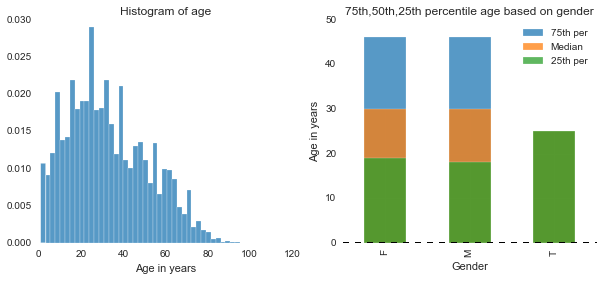

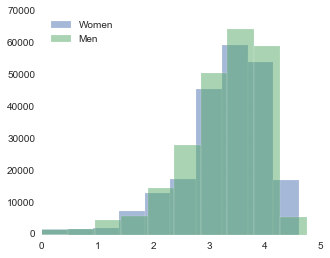

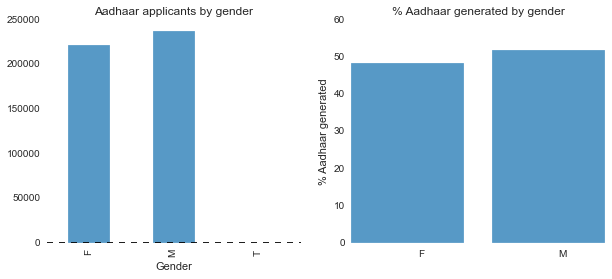

In [49]:
def prepare_plot_area(ax):
    # Remove plot frame lines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)  
    ax.spines["left"].set_visible(False) 
    
    # X and y ticks on bottom and left
    ax.get_xaxis().tick_bottom()  
    ax.get_yaxis().tick_left() 
    
# Defining a color pattern based
colrcode = [(31, 119, 180), (255, 127, 14),\
             (44, 160, 44), (214, 39, 40), \
             (148, 103, 189),  (140, 86, 75), \
             (227, 119, 194), (127, 127, 127), \
             (188, 189, 34), (23, 190, 207)]

for i in range(len(colrcode)):  
    r, g, b = colrcode[i]  
    colrcode[i] = (r / 255., g / 255., b / 255.)


# Histogram of age of Aadhar applicants
fig,axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
p = plt.hist(df[df['Age'].notnull()]['Age'], 50, normed=1, facecolor=colrcode[0], edgecolor = [1,1,1], alpha=0.75)
plt.title('Histogram of age')
plt.xlabel('Age in years')
prepare_plot_area(plt.gca())

plt.sca(axes[1])
g = df.groupby('Gender')['Age'].quantile(.75)
g2 = df.groupby('Gender')['Age'].median()
g3 = df.groupby('Gender')['Age'].quantile(.25)
g.plot(kind = 'bar',color = colrcode[0],label = '75th per',edgecolor = [1,1,1], alpha=0.75)
g2.plot(kind = 'bar',color = colrcode[1],label = 'Median',edgecolor = [1,1,1], alpha=0.75)
g3.plot(kind = 'bar',color = colrcode[2],label = '25th per',edgecolor = [1,1,1], alpha=0.75)
plt.title('75th,50th,25th percentile age based on gender')
plt.ylabel('Age in years')
plt.xlabel('Gender')
plt.xticks([0,1,2],['F','M','T'])
plt.legend(loc = 'best')
prepare_plot_area(plt.gca())

# Age comparison: men vs women
fig = plt.figure(figsize=(5, 4))
np.log(df[(df['Gender']==0)&(df['Age'].notnull())]['Age']).hist(alpha = 0.5,label = 'Women',edgecolor = [1,1,1])
np.log(df[(df['Gender']==1)&(df['Age'].notnull())]['Age']).hist(alpha = 0.5,label = 'Men',edgecolor = [1,1,1])
plt.legend(loc = 'best')
plt.title('Histogram of log(age) by gender')
plt.xlabel('Log(Age in years)')

# t-test
t,p_val = sp.stats.ttest_ind(np.log(df[(df['Gender']==0)&(df['Age'].notnull())]['Age']),np.log(df[(df['Gender']==1)&(df['Age'].notnull())]['Age']),equal_var = False)
print('The p value is ',p_val)

# Calculate percentage of Aadhar's approval rate based on gender
perM = np.around(df['Gender'].sum()/df['Gender'].count()*100,2)
perF = np.around(df[df['Gender']== 0]['Gender'].count()/df['Gender'].count()*100,2)
perT = np.around(df[df['Gender']== 2]['Gender'].count()/df['Gender'].count()*100,2)
# Since perT is ~0, we will ignore it. Also it is based on one sample which is a very small number of samples.


# Aadhar applicants by gender
fig,axes = plt.subplots(figsize=(10, 4), nrows=1, ncols=2)
plt.sca(axes[0])
g = df.groupby('Gender')['generated'].count()
g.plot(kind = 'bar',color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.title('Aadhaar applicants by gender')
plt.xticks([0,1,2],['F','M','T'])
prepare_plot_area(plt.gca())


plt.sca(axes[1])
plt.bar([1,2],[perF,perM],color = colrcode[0],alpha = 0.75,edgecolor = [1,1,1])
plt.xticks([1.5,2.5],['F','M'])
plt.title('% Aadhaar generated by gender')
plt.ylabel('% Aadhaar generated')
prepare_plot_area(plt.gca())




* The age distribution shows that most number of Aadhaar members occur in the 20-40 range with the median age being 30 for men and women.
* Based on the p-value, we cannot reject the null hypothesis that the mean age of Aadhaar applicants of women and men are equal.
* The number of applicants based on gender reflects a close 50-50. However, the number of male applicants being slightly higher could just be reflecting on the fact that male population in India is higher than the female population.
* The percentage of Aadhaar generated to those applied is also slightly higher for Males than Females. This is a little surprising.

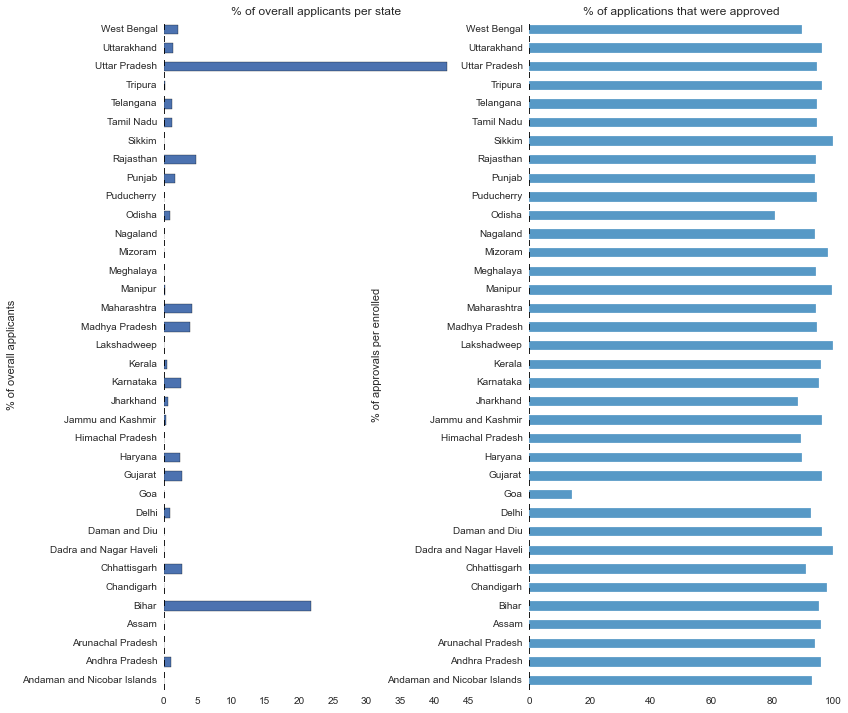

In [50]:
c = df.groupby('State')['generated'].sum()
d = df.groupby('State')['generated'].count()
perc_gen_per_state = c/d*100
perc_total = d = d/d.sum()*100
# perc_gen_per_state.sort(ascending =False)

fig,axes = plt.subplots(figsize = (12,12),nrows = 1,ncols =2)
plt.sca(axes[0])
perc_total.plot(kind = 'barh')
plt.ylabel('% of overall applicants')
plt.title('% of overall applicants per state')
prepare_plot_area(plt.gca())


plt.sca(axes[1])
perc_gen_per_state.plot(kind = 'barh',color = colrcode[0],edgecolor = [1,1,1],alpha=  0.75)
plt.ylabel('% of approvals per enrolled')
plt.title('% of applications that were approved')
prepare_plot_area(plt.gca())





The above two plots gives us some information about Aadhaar application per state.

* Some states seem to have a much larger number of Aadhaar applicants than others. Example Bihar and Uttar Pradesh together make up almost 65% of overall Aadhaar applicants. We will have to investigate if this is simply because of the large populations of these states or is there any other reason?
* There seems to be differences between states in terms of number of approvals. Goa having a very small approval rate could be simply due to the small number of applicants in this state which skews the statistics.
